In [26]:
import numpy as np
import scipy.io as sio
import scipy.optimize as so
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Verdana')

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [27]:
iris = load_iris()
X = iris['data'][:,:2]
y = iris['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)            # scaler хранит параметры нормировки
X_train_transformed = scaler.transform(X_train)   # нормируем с теми же параметрами
X_test_transformed = scaler.transform(X_test)     # нормируем тестовую выборку

In [29]:
print(X_train.shape)
print(X_test.shape)

(112, 2)
(38, 2)


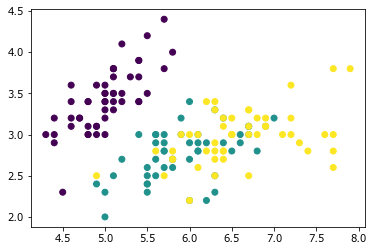

In [30]:
plt.scatter(X[:, 0], X[:,1], c=y)
plt.show()

*Попробуйте решить рассмотренную выше задачу для случая трёх и более классов. В этой и последующих задачах выполните нормализацию перед обучением и оцените результаты с помощью перекрёстной проверки. Посмотрите, как влияет параметр $C$ на решение. Попробуйте использовать полиномиальный классификатор ('poly') или радиально-базисные функции ('rbf').*
-------------

In [31]:
classify = SVC(C=1.0,             # коэффициент регуляризации
          kernel='linear',)   # вид ядра (линейное)

classify.fit(X_test_transformed, y_test)

SVC(kernel='linear')

In [32]:
classify.predict(X_test_transformed)

array([1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2])

In [33]:
classify.score(X_test_transformed, y_test)

0.7894736842105263

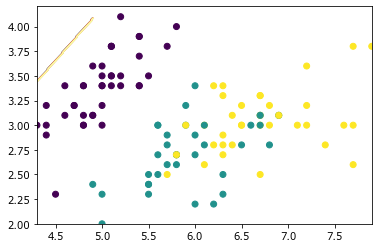

In [34]:
h = 0.01 # Шаг сетки

# Строим сетку
xx, yy = np.meshgrid(np.arange(min(X_train[:, 0]), max(X_train[:, 0]), h),
                     np.arange(min(X_train[:, 1]), max(X_train[:, 1]), h))



# Вычисляем класс для каждой точки сетки
Z = classify.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Отображаем данные и границу классов
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

In [35]:
scores = cross_val_score(classify,  # Классификатор
                         X, y, # Все данные
                         cv=5  # Количество частей
                        )
print (scores)
print ("Точность: %0.2f (±%0.2f)" % (scores.mean(), scores.std() * 2))

[0.73333333 0.83333333 0.76666667 0.86666667 0.83333333]
Точность: 0.81 (±0.10)


$C$ - штраф целевой функции, необходим в переобучении. В большинстве случаев проявляется в том, что итоговые модели имеют слишком большие значения параметров

**Наблюдения:**

1.   линейный (linear)
    *   C = 1: 0.81 (±0.10)
    *   C = 2: 0.81 (±0.11)
    *   C = 4: 0.81 (±0.11)
2.   полиномиальный классификатор (poly)
    *   C = 1: 0.81 (±0.12)
    *   C = 2: 0.81 (±0.12)
    *   C = 4: 0.81 (±0.12)
3.   радиально-базисные функции (rbf)
    *   C = 1: 0.82 (±0.12)
    *   C = 2: 0.82 (±0.12)
    *   C = 4: 0.81 (±0.10)

*Решите задачу классификации ирисов Фишера с помошью логистической регрессии с использованием scikit-learn и непосредственным программированием. (Для этого может пригодиться код из предыдущей лабораторной работы.)*
---------------------

In [36]:
classifyLog = LogisticRegression(random_state=0)

In [37]:
classifyLog.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [38]:
classifyLog.predict(X_test_transformed)

array([1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1])

In [39]:
classifyLog.score(X_test_transformed, y_test)

0.6578947368421053

In [40]:
scores = cross_val_score(classifyLog,  # Классификатор
                         X, y, # Все данные
                         cv=5  # Количество частей
                        )
print (scores)
print ("Точность: %0.2f (±%0.2f)" % (scores.mean(), scores.std() * 2))

[0.73333333 0.83333333 0.76666667 0.86666667 0.86666667]
Точность: 0.81 (±0.11)


*Решите задачу классификации ирисов Фишера методом kNN с использованием scikit-learn и непосредственным программированием. Как на результат влияет параметр k?*
-------------

In [41]:
classifyNeigh = KNeighborsClassifier(n_neighbors=7)

In [42]:
classifyNeigh.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
classifyNeigh.predict(X_test_transformed)

array([1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1])

In [44]:
classifyNeigh.score(X_test_transformed, y_test)

0.631578947368421

In [45]:
scores = cross_val_score(classifyNeigh,  # Классификатор
                         X, y, # Все данные
                         cv=5  # Количество частей
                        )
print (scores)
print ("Точность: %0.2f (±%0.2f)" % (scores.mean(), scores.std() * 2))

[0.73333333 0.83333333 0.8        0.86666667 0.73333333]
Точность: 0.79 (±0.11)


Параметр k (n_neighbors) - выбор числа соседей. При k=1 алгоритм ближайшего соседа неустойчив к шумовым выбросам: он даёт ошибочные классификации не только на самих объектах-выбросах, но и на ближайших к ним объектах других классов. При k=m, наоборот, алгоритм чрезмерно устойчив и вырождается в константу. Таким образом, крайние значения k нежелательны.

*Решите задачу классификации ирисов Фишера методом SVM с использованием scikit-learn. Как на результат влияет параметр C?*
-------------

In [46]:
classifySVM = make_pipeline(StandardScaler(), SVC(C=1,gamma='auto'))

In [47]:
classifySVM.fit(X_train_transformed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto'))])

In [48]:
classifySVM.predict(X_test_transformed)

array([1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1])

In [49]:
classifySVM.score(X_test_transformed, y_test)

0.6842105263157895

In [50]:
scores = cross_val_score(classifySVM,  # Классификатор
                         X, y, # Все данные
                         cv=5  # Количество частей
                        )
print (scores)
print ("Точность: %0.2f (±%0.2f)" % (scores.mean(), scores.std() * 2))

[0.73333333 0.86666667 0.73333333 0.83333333 0.86666667]
Точность: 0.81 (±0.12)


  Параметр C - данный параметр помогает отрегулировать ту тонкую грань между “гладкостью” и точностью классификации объектов обучающей выборки. Чем больше значение “С” тем больше объектов обучающей выборки будут правильно классифицированы.

*Сформулируйте и запишите выводы. Как влияет регуляризация на результаты обучения? Можно ли обучить классификатор так, чтобы он не давал ошибок? Какой метод показал себя лучше: логистическая регрессия, метод опорных векторов или метод kNN?*
-------------



1.   Регуляризация помогает уменьшать переобучение.
2.   В идеальном случае, когда классификатор не делает ошибок (FPR (долю из объектов предсказанных не верно) = 0, TPR (полнота) = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
3.   Метод опорных векторов, возможно, один из самых эффективных классических классификаторов.